Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the data base

In [210]:
#Read data base
df = pd.read_csv('/content/shrink_ray_dataset.csv')
#Get shape
df.shape

(200, 2)

**Data describtion**
1.   Power (in watt): power consumed by the gun (column one)
2.   Shrinkage (percentage): shrinkage level (cloumn two)



In [211]:
df.head()

Power  Shrinkage
0   0.00       0.00
1   1.51       0.00
2   3.02       0.00
3   4.52       2.67
4   6.03       0.00

In [212]:
df.describe()

Power   Shrinkage
count  200.000000  200.000000
mean   150.000000   45.274700
std     87.254773   28.252884
min      0.000000    0.000000
25%     75.002500   20.435000
50%    150.000000   43.855000
75%    224.997500   70.595000
max    300.000000   94.920000

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Power      200 non-null    float64
 1   Shrinkage  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [214]:
df['Power'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0.00
1        1.51
2        3.02
3        4.52
4        6.03
        ...  
195    293.97
196    295.48
197    296.98
198    298.49
199    300.00
Name: Power, Length: 200, dtype: float64>

In [215]:
x = df.drop(['Shrinkage'], axis = 1)
y = df['Shrinkage']
print(x.shape)
print(y.shape)

(200, 1)
(200,)


In [216]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 1)
(160,)
(40, 1)
(40,)


In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lgr = LinearRegression( )
#Train the model
lgr.fit(x_train, y_train)



LinearRegression()

In [218]:
y_pred = lgr.predict(x_train)
print(y_pred.shape)
print(y_train.shape)

(160,)
(160,)


In [219]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [224]:
# Calculate the sum of squared differences between the data points and the mean
St = np.sum((y_train - np.mean(y_train)) ** 2)

# Calculate the sum of squared differences between the data points and the straigt line
Sr = np.sum((y_train - y_pred) ** 2)

# Calculate Coefficient of determination
r_squared = 1 - (Sr / St)

print("Accuracy:", r_squared)

Accuracy: 0.9883810344950014


In [225]:
#Run the model on the test set
y_pred = lgr.predict(x_test)
y_pred
print(y_pred.shape)

(40,)


In [228]:
# Calculate the sum of squared differences between the data points and the mean
St = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate the sum of squared differences between the data points and the straigt line
Sr = np.sum((y_test - y_pred) ** 2)

# Calculate R-squared
r_squared = 1 - (Sr / St)

print("Accuracy:", r_squared)

Accuracy: 0.9900017022356886


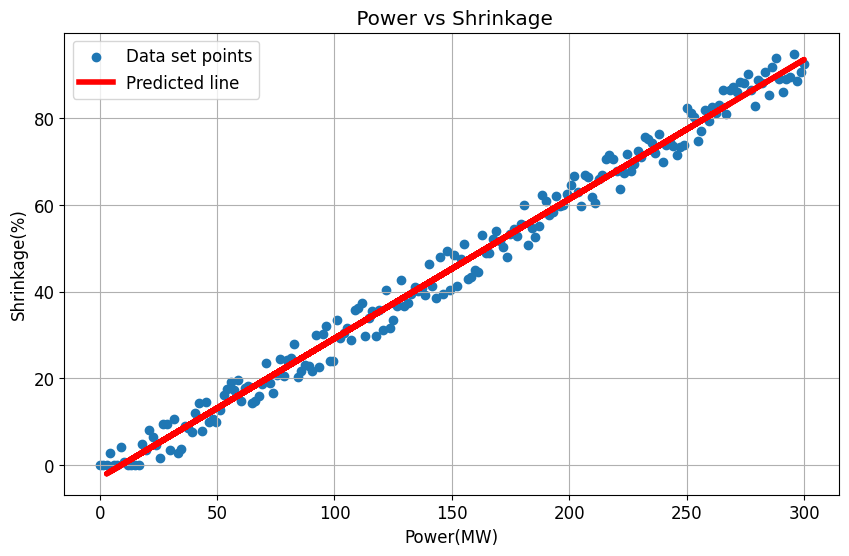

In [229]:
#Ploting the data vs the predicted line

x = df["Power"] # Column 1
y = df['Shrinkage']    # Column 2

plt.figure(figsize=(10, 6))
# Plot the data on scatter plot
plt.scatter(x, y, label = 'Data set points')
#Plot the straight predicted line
plt.plot(x_test, y_pred, color = 'r', label = 'Predicted line' )
# Add labels and title
plt.xlabel('Power(MW)')
plt.ylabel('Shrinkage(%)')
plt.title(' Power vs Shrinkage')
# Show the plot
plt.legend()
plt.show()

